# Manual Image 2D Convolution
This process for CNN is done automatically by Keras. This is just a manual method for convolving an image with a
specific Kernel to learn the concepts of Image Filtering by various Kernels.

## This Cell creates the Convolution Function. 

In [1]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

## Read the Image
<font color=red> Note: Your Image must be in the same Folder with the code.

In [2]:
import numpy as np
from PIL import Image

img = Image.open('../../images/Ahmad_in_Canyon1.png')
ImArray = np.array(img) / 1  # you can scale the image values, for example /255

## Show the Image

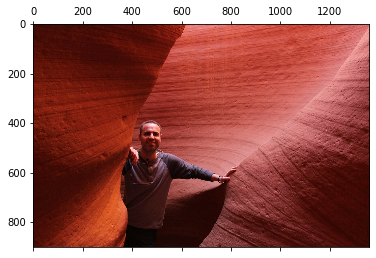

In [3]:
from matplotlib import pyplot as plt

plt.matshow(img, cmap=plt.cm.gray)
plt.show()

## A Quick Check of the Image Data

In [4]:
ImArray.shape

(903, 1361, 4)

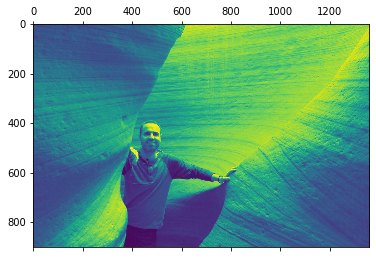

In [5]:
FirstLayer = ImArray[:, :, 0]  # You can check each RGB matrix. The 4th dimension is all zero(only for videos)
plt.matshow(FirstLayer)
plt.show()

## Convolving the Image

### Creating a Kernel

In [6]:
# You can make different Kernels as you want, here are a few examples
kernel = np.array([[-1, -1, -1], [-1, 1, -1], [-1, -1, -1]])
#kernel = np.array([[-1, -1, -1, 1], [-1, 8, -1, 1], [-1, -1, -1, 1],[-1, -1, -1, 1]])
#kernel = np.array([[0, 0, 0, 0,0], [0, -2, -1, 0, 0], [0, -1, 1, 1, 0],[0, 0, 1, 2, 0],[0, 0, 0, 0,0]])
#kernel = np.array([[0, 0, 0, 0, 0], [0, 0, -1, 0, 0], [0, -1, 3, -1, 0],[0, 0, -1, 0, 0],[0, 0, 0, 0,0]])

### Apply the Convolution Function

In [7]:
output1 = convolve2D(ImArray[:, :, 0], kernel, padding=1)
output2 = convolve2D(ImArray[:, :, 1], kernel, padding=1)
output3 = convolve2D(ImArray[:, :, 2], kernel, padding=1)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  71.  70. ... 212. 225.   0.]
 [  0.  69.  71. ... 223. 230.   0.]
 ...
 [  0.  70.  69. ...  50.  48.   0.]
 [  0.  67.  69. ...  51.  50.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   9.  12. ... 110. 127.   0.]
 [  0.  10.  13. ... 127. 136.   0.]
 ...
 [  0.  11.  12. ...   8.   8.   0.]
 [  0.   8.  11. ...  10.  10.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   4.   6. ... 108. 125.   0.]
 [  0.   4.   6. ... 122. 131.   0.]
 ...
 [  0.   4.   5. ...   2.   2.   0.]
 [  0.   2.   5. ...   4.   4.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [8]:
output = output1 + output2 + output3

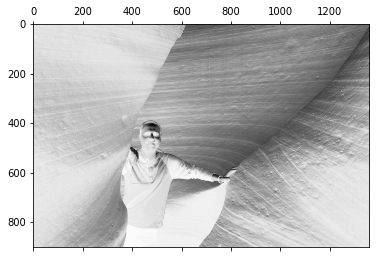

In [9]:
from matplotlib import pyplot as plt

plt.matshow(output, cmap=plt.cm.gray)
plt.show()

## Study more from this link

https://goodboychan.github.io/python/datacamp/tensorflow-keras/vision/deep_learning/2020/08/03/02-Using-Convolutions-in-Keras.html

# Convolution by Keras

With Keras we can apply convolution easily!

In [10]:
from tensorflow import keras

conv = keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="same", activation='relu')

2021-10-19 10:55:54.738681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-19 10:55:54.738703: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


##### But, What are the filters apply by Keras?
We don't need to decide which filter/kernel to use. During training, the values in the filters are optimised with
backpropagation with respect to a loss function.

https://datascience.stackexchange.com/questions/16463/what-is-are-the-default-filters-used-by-keras-convolution2d

<font color=green> We will continue with CNN next lecture.